## The static electric field and forces
The static electric force created by a single fixed charge q<sub>1</sub> on another one q<sub>2</sub> is a vector force (**Coulomb's law**) usually written as:

$$ \vec{F}=\frac{1}{4\pi \varepsilon _{0}}\frac{q_{1}q_{2}}{r^{2}}\vec{e_{12}} $$

(with the vector e<sub>12</sub> pointing from 2 to 1)

This lets us define a field which is related to the above force by the relationship:

$$ \vec{F}=q_{1}\vec{E}  $$

From the first formula, it follows that the field can be computed from a single charge's location with:

$$ \vec{E}=\frac{1}{4\pi \varepsilon _{0}}\frac{q_{2}}{r^{2}}\vec{e_{12}} $$

And if you have multiple charges, you just sum over these to get the total field:

$$ \vec{E_{total}}=\sum \frac{1}{4\pi \varepsilon _{0}}\frac{q_{i}}{r_{i}^{2}}\vec{e_{i}} $$

## Implementation using Python
Let's first define a charged particle class that allows us to compute the field and the potential.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

class ChargedParticle:
    def __init__(self, pos, charge):
        self.pos = np.asarray(pos)
        self.charge = charge
        
    def compute_field(self, x, y):
        X, Y = np.meshgrid(x, y)
        u_i = np.hstack((X.ravel()[:, np.newaxis],  Y.ravel()[:, np.newaxis])) - self.pos
        r = np.sqrt((X - self.pos[0])**2 + (Y - self.pos[1])**2)
        field = ((self.charge / r**2).ravel()[:, np.newaxis] * u_i).reshape(X.shape + (2,))
        return field
    
    def compute_potential(self, x, y):
        X, Y = np.meshgrid(x, y)
        r = np.sqrt((X - self.pos[0])**2 + (Y - self.pos[1])**2)
        potential = self.charge / r
        return potential

We can test it by creating **two particles with opposite charge**.

In [8]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-4, 4, 80)

Y, X = np.meshgrid(x, y)

q1 = ChargedParticle((-1, 0), -1)
q2 = ChargedParticle((1, 0), 1)

field1 = q1.compute_field(x, y)
field2 = q2.compute_field(x, y)

Let's plot their **fields**:

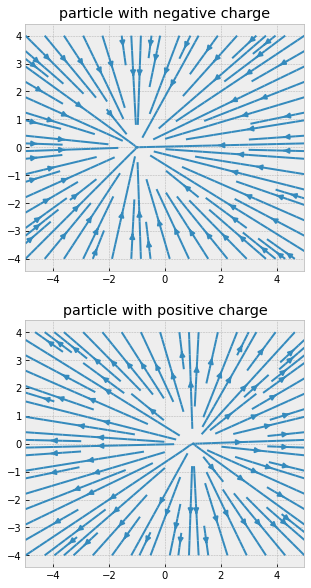

In [7]:
field1 = q1.compute_field(x, y)
field2 = q2.compute_field(x, y)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(5, 10))
ax1.streamplot(x, y, u=field1[:, :, 0], v=field1[:, :, 1])
ax1.set_title("particle with negative charge");
ax1.axis('equal')
ax2.streamplot(x, y, u=field2[:, :, 0], v=field2[:, :, 1])
ax2.set_title("particle with positive charge");
ax2.axis('equal');

As expected, field lines are **converging** towards the negative charge and **diverging** from the posive charge. We can now compute the whole field by summing over the individual electric fields.

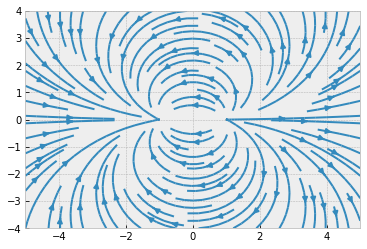

In [10]:
def compute_resulting_field(particles, x, y):
    fields = [p.compute_field(x, y) for p in particles]
    total_field = np.zeros_like(fields[0])
    for field in fields:
        total_field += field
    return total_field

total_field = compute_resulting_field([q1, q2], x, y)

plt.streamplot(x, y, total_field[:, :, 0], total_field[:, :, 1])
plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max());

We can even explore some options regarding the streamplot.

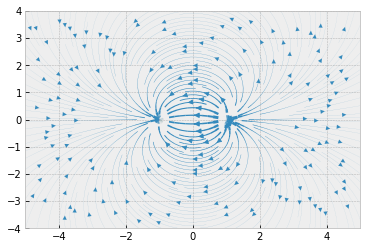

In [11]:
lw = np.linalg.norm(total_field, axis=2)
lw /= lw.max()
plt.streamplot(x, y, total_field[:, :, 0], total_field[:, :, 1], linewidth=10*lw, density=2)
plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max());